### Testing the satellite code in _luseepy_

* Import prerequisites



In [7]:
import  lusee
from    lusee import Observation
from    lusee import Satellite, ObservedSatellite
import  numpy as np
import  matplotlib.pyplot as plt
import  lunarsky

print(f'''lusee path: {lusee.__path__[0]}''')
print(f'''lunarsky path: {lunarsky.__path__[0]}''')

lusee path: /home/maxim/projects/lusee/luseepy/lusee
lunarsky path: /home/maxim/.virtualenvs/lusee-simpy/lib/python3.10/site-packages/lunarsky


In [8]:
obs     = Observation(deltaT_sec=60)
S       = Satellite()
obsat   = ObservedSatellite(obs,S)

---

### Plot the trajectory

Test plot


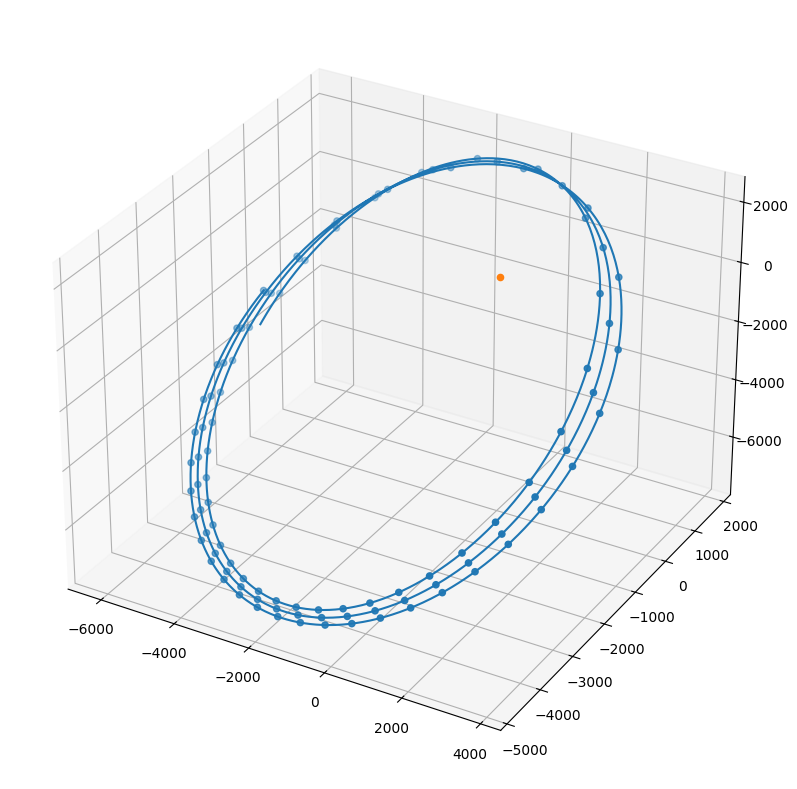

In [26]:
# fig, (p1, p2) = plt.subplots(1,2)
fig = plt.figure(figsize=plt.figaspect(0.5))
#fig.suptitle('Simulation', fontsize=20)
plt.rcParams["figure.figsize"] = [12., 6.]
#plt.rcParams["figure.autolayout"] = True


ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot3D(posxyz[:2000,0],posxyz[:2000,1],posxyz[:2000,2])
ax.scatter3D(posxyz[:2000:20,0],posxyz[:2000:20,1],posxyz[:2000:20,2])
_ = ax.scatter3D(0,0,0)

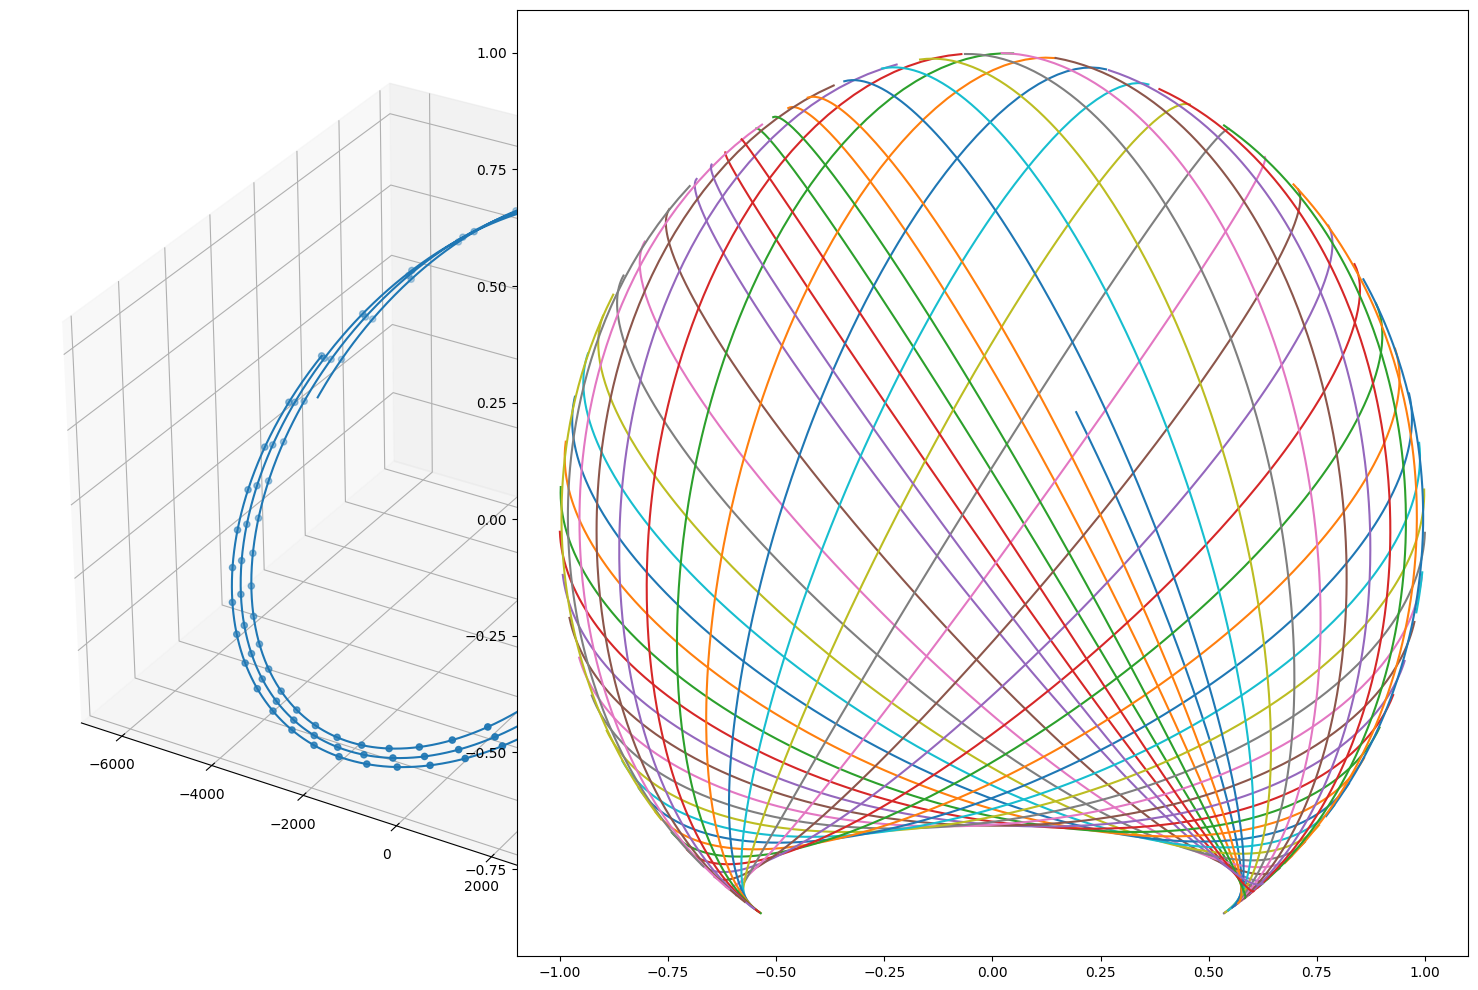

In [31]:
fig     = plt.figure(figsize=(20,10))
plt.rcParams["figure.autolayout"] = True
ax      = plt.axes(projection='3d')
posxyz  = obsat.posxyz

ax.plot3D(posxyz[:2000,0],posxyz[:2000,1],posxyz[:2000,2])
ax.scatter3D(posxyz[:2000:20,0],posxyz[:2000:20,1],posxyz[:2000:20,2])
_ = ax.scatter3D(0,0,0)

ax = fig.add_subplot(1, 2, 2)
obsat.plot_tracks(ax)
plt.show()


Text(0, 0.5, 'N-S')

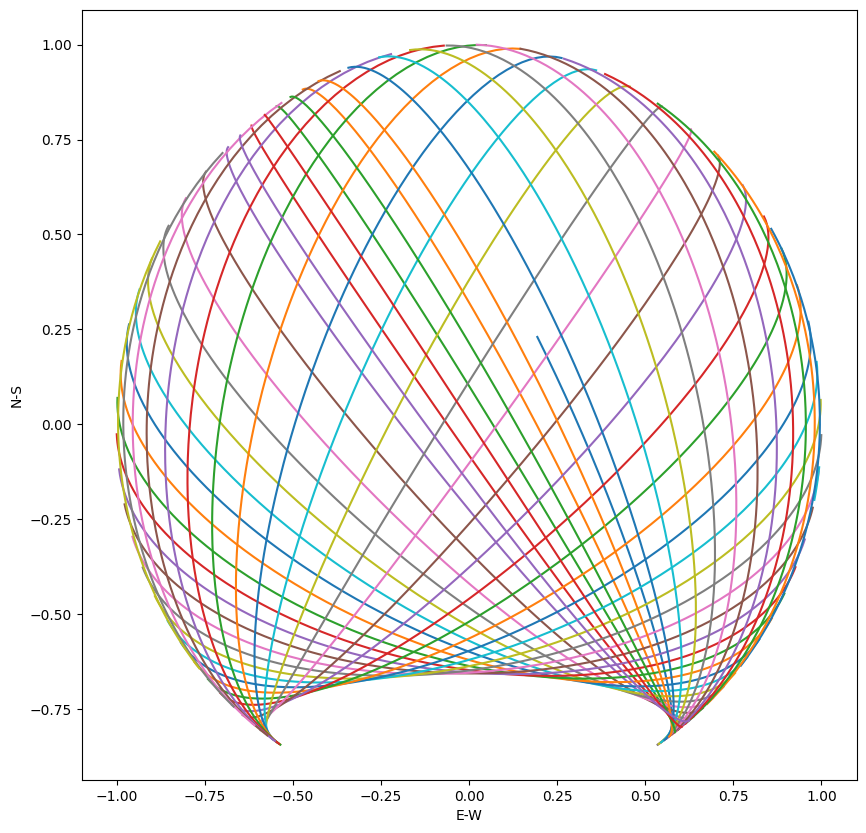

In [16]:
plt.figure(figsize=(10,10))
obsat.plot_tracks(plt)
plt.xlabel("E-W")
plt.ylabel("N-S")

In [6]:
transits = obsat.get_transit_indices()
print (len(transits))

64


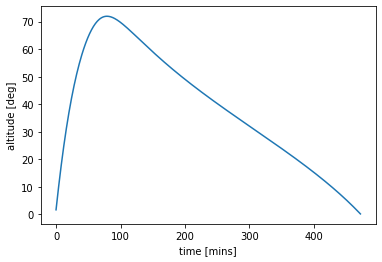

In [7]:
# Take transit #5
i,j = transits[5]
plt.plot(np.arange(j-i),obsat.alt_rad()[i:j]/np.pi*180)
plt.xlabel('time [mins]')
plt.ylabel('altitude [deg]')
pass